# Clustering

In [8]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from collections import Counter
import Utility
import matplotlib.dates as mdates

## Hierarchical

In [2]:
cycleA = pd.read_csv("./Data/Chickens data/WithMacro/CycleA-Clean.csv")

In [4]:
cycleA=cycleA.drop(columns=["Arrival Chickens Date","Date of Selling","# Eggs sold (First quality)", "# Eggs sold (Second quality)", "MinTemp", "MaxTemp", "Date of Laid"])
cycleA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Death      627 non-null    int64  
 1   Chickens   627 non-null    int64  
 2   DeathPerc  627 non-null    float64
 3   Eggs       627 non-null    int64  
 4   Laied      627 non-null    float64
 5   Water      627 non-null    float64
 6   Feed       627 non-null    float64
 7   AvgTemp    627 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 39.3 KB


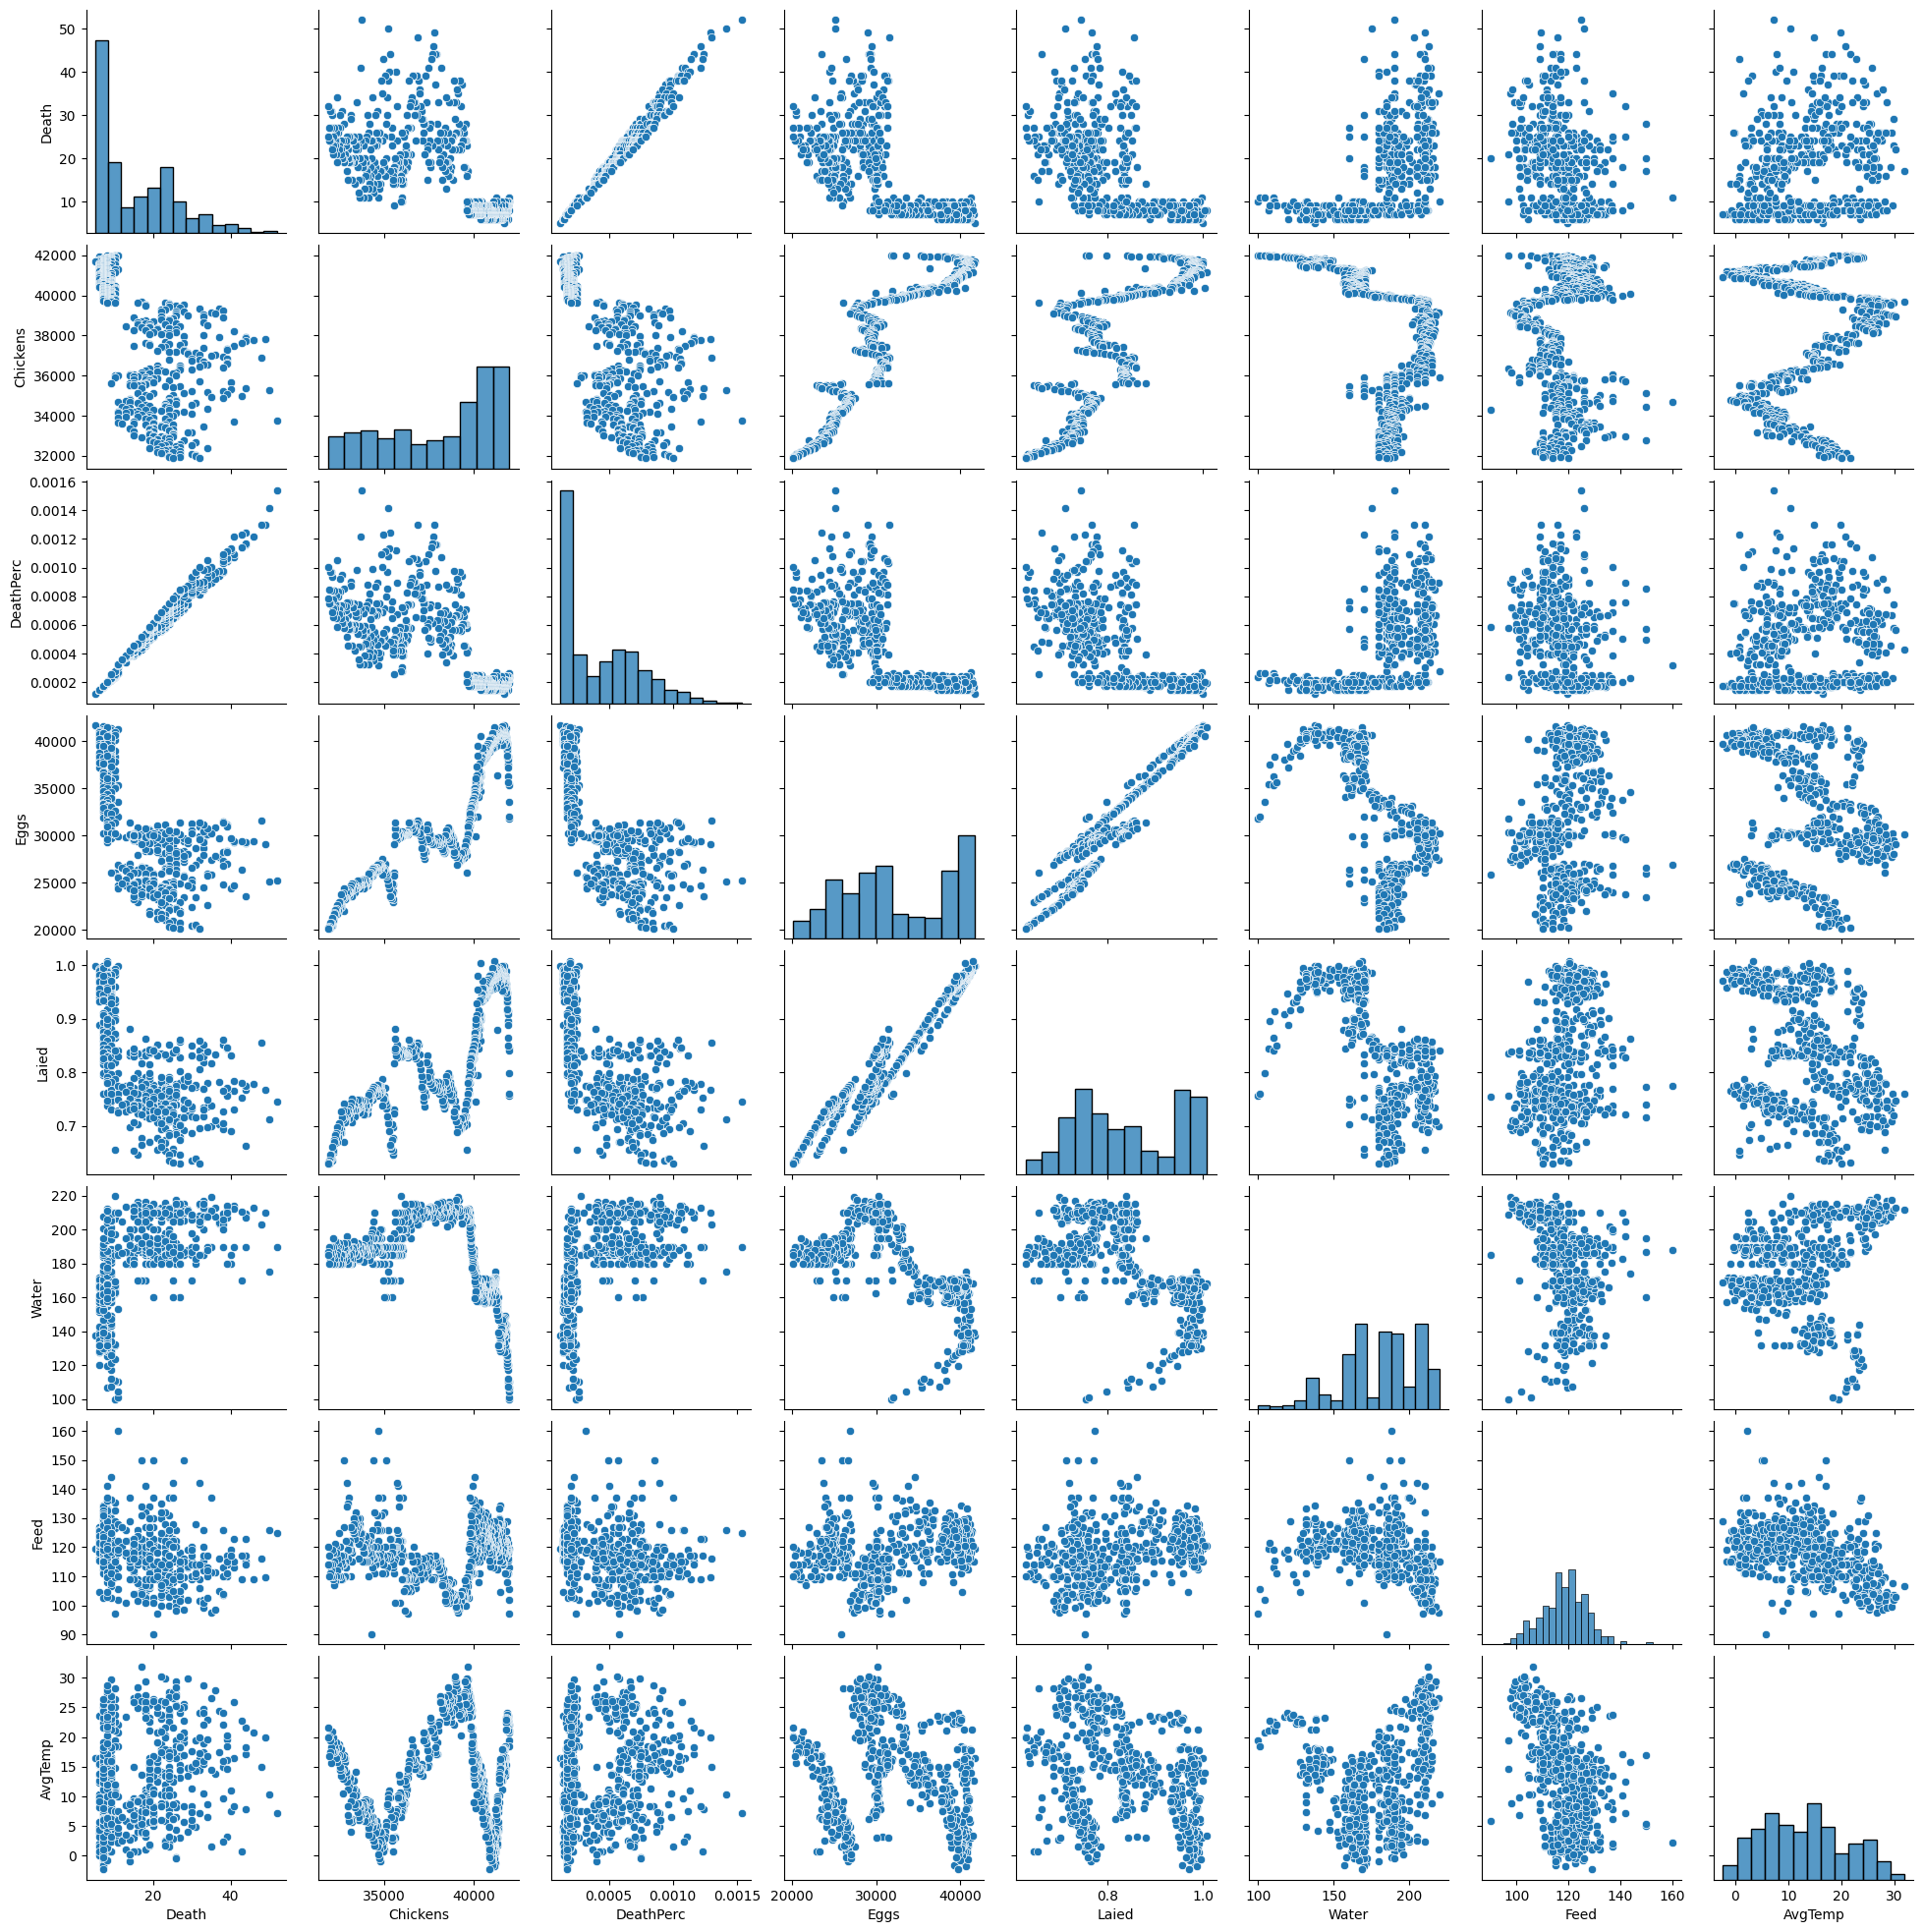

In [5]:
sns.pairplot(cycleA)

In [6]:
#understand the number of component needed in our analysis
pca = PCA(n_components=8)
pca.fit_transform(cycleA)
pca.explained_variance_ratio_.cumsum()

array([0.97335763, 0.99999022, 0.99999726, 0.99999862, 0.99999943,
       1.        , 1.        , 1.        ])

In [7]:
scaler = MinMaxScaler()

data=pd.DataFrame(scaler.fit_transform(cycleA.values), columns=cycleA.columns, index=cycleA.index)
# sns.pairplot(data)

(627, 2)


<AxesSubplot:>

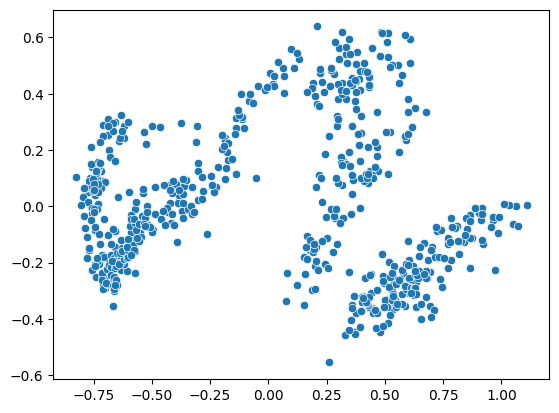

In [8]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(data)
print(pcs.shape)
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

In [9]:
data = data[["DeathPerc", "Water"]]
data

,DeathPerc,Water
0,0.083205,0.000000
1,0.100015,0.008333
2,0.100063,0.037500
3,0.049778,0.058333
4,0.100147,0.083333
...,...,...
622,0.443956,0.716667
623,0.444353,0.750000
624,0.510951,0.666667
625,0.467283,0.725000


In [10]:
plt.figure()
plt.title("Polli Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = data
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.axhline(y = 6, color = 'r', linestyle = '-')
plt.show()

KeyboardInterrupt: 

Text(0.5, 1.0, 'Labeled Customer Data')

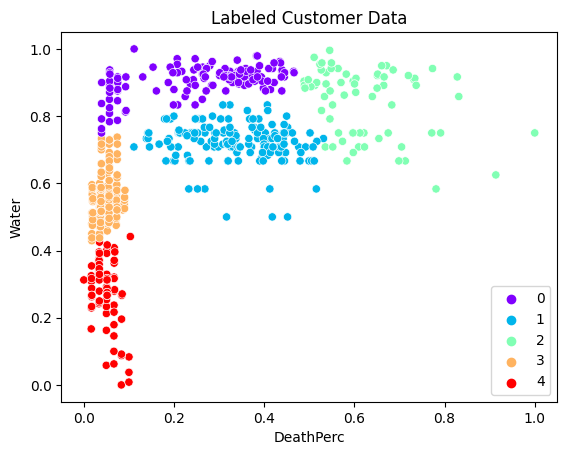

In [ ]:
clustering_model = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', compute_full_tree=True, distance_threshold=2)
clustering_model.fit_predict(selected_data)
data_labels = clustering_model.labels_ #print the clust per item
sns.scatterplot(x="DeathPerc", y="Water",data=selected_data, 
                hue=data_labels, palette="rainbow").set_title('Labeled Customer Data')

In [ ]:
def HierarchicalClutering(dataSet, attributes):
    scaler = MinMaxScaler()
    data=pd.DataFrame(scaler.fit_transform(dataSet.values), columns=dataSet.columns, index=dataSet.index)
    
    data = data[attributes]
    plt.figure()
    plt.title("Dendrogram")

    # Selecting Annual Income and Spending Scores by index
    selected_data = data
    clusters = shc.linkage(selected_data, 
                method='ward', 
                metric="euclidean")
    shc.dendrogram(Z=clusters)
    plt.show()

    n_cluster = input("How many cluster do you want?")
    clustering_model = AgglomerativeClustering(n_clusters=int(n_cluster), affinity='euclidean', linkage='ward')
    clustering_model.fit(selected_data)
    data_labels = clustering_model.labels_ #print the clust per item
    sns.scatterplot(x=attributes[0], y=attributes[1],data=selected_data, hue=data_labels, palette="rainbow").set_title('Clusters')

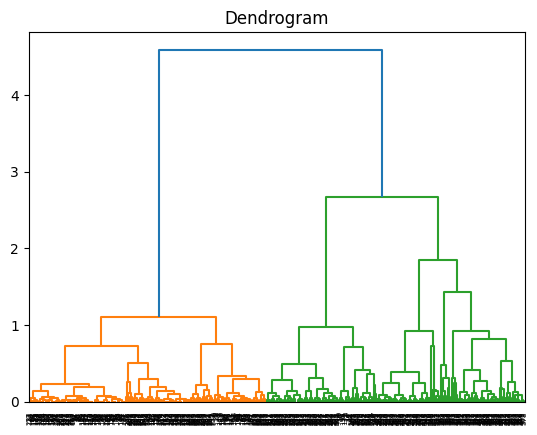

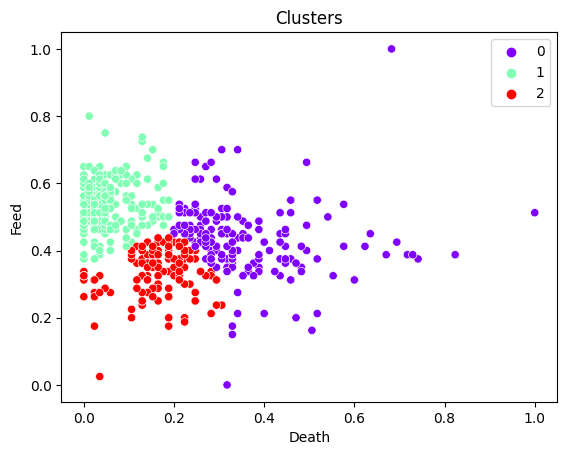

In [ ]:
test = pd.read_csv("./Data/Chickens data/WithMacro/CycleB-Clean.csv")
Utility.HierarchicalClutering(test, ["Death", "Feed"])

## DBSCAN

In [3]:
cycleA = pd.read_csv("./Data/Chickens data/WithMacro/CycleA-Clean.csv")

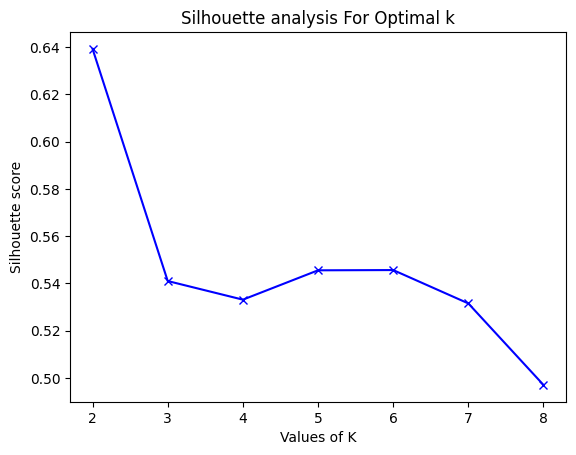

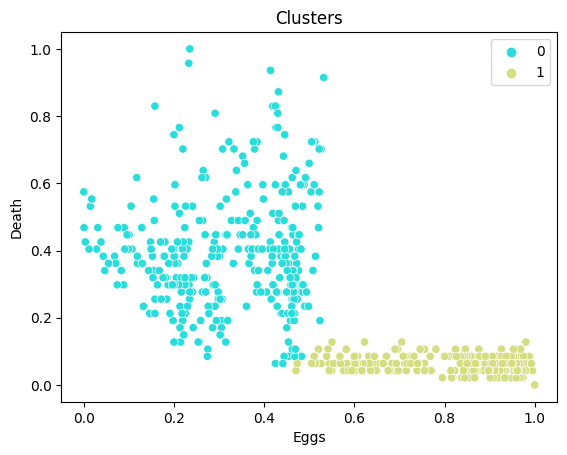

In [6]:
labels = Utility.KMeanClustering(cycleA, ["Eggs", "Death"])

In [11]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,

In [40]:
def TemporalCluster(dataSet, dataLabels ,attributes, attribute):
    '''
        Plot a cluster in a temporal plot

    Parameters:
    ----------
        dataSet: DataFrame
            the datset interested in cluster, a cycle
        attributes: array of str
            the 2 attributes interested in cluster 
        attribute: str
            the attribute to plot

    Return:
    '''

    data_date=dataSet.rename(columns={"Date of Laid": "Date"})
    dataSet=dataSet.drop(columns=["Arrival Chickens Date","Date of Selling","Date of Laid"])
    
    scaler = MinMaxScaler()
    data=pd.DataFrame(scaler.fit_transform(dataSet.values), columns=dataSet.columns, index=dataSet.index)
    
    data_date.Date = pd.to_datetime(data_date.Date, format = '%m/%d/%Y')
    data2 = data[attributes]

    label_group = Counter(dataLabels)
    print(label_group)
    elimFrom = int(input("From which cluster you want to eliminate? (-1 if none)"))
    if elimFrom != -1:
        for i in range(len(dataLabels)):
            if dataLabels[i] >= elimFrom:
                dataLabels[i] = -1
        label_group = Counter(dataLabels)
        print(label_group)

    sns.scatterplot(x=attributes[0], y=attributes[1],data=data2, hue=dataLabels,legend="full", palette="rainbow").set_title('Clusters')

    cmap = mpl.colormaps['rainbow']
    if (label_group.keys().__contains__(-1)):
        num = len(label_group.keys())-1
    else:
        num = len(label_group.keys())+1
    step = 1.0/num
    
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Date')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=31))

    for i in range(len(dataLabels)):
        color = cmap.get_under()
        if (dataLabels[i] >= 0):
            color = cmap(step*(dataLabels[i]+1))
        ax1.plot(data_date["Date"][i],data[attribute][i],"x", color=color)

        month =  data_date.Date.dt.month[i]
        if (month==9)|(month==10)|(month==11):
            color='brown'
        elif (month==12)|(month==1)|(month==2):
            color = 'blue'
        elif (month==3)|(month==4)|(month==5):
            color = 'green'
        elif (month==6)|(month==7)|(month==8):
            color = 'orange'
        ax1.axvline(data_date["Date"][i], color=color,alpha=0.05)

    plt.gcf().autofmt_xdate()
    plt.xticks(rotation=45)
    plt.show()

Counter({0: 332, 1: 295})


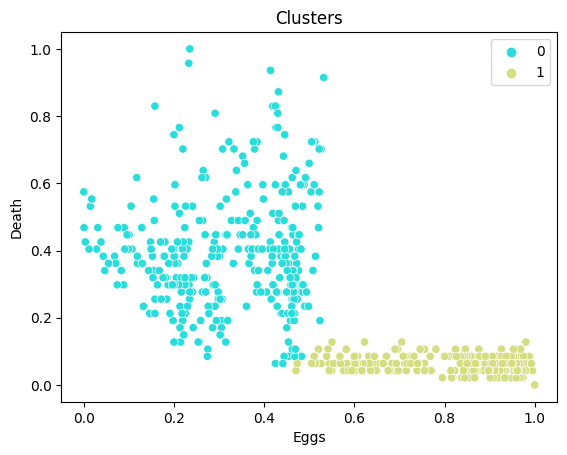

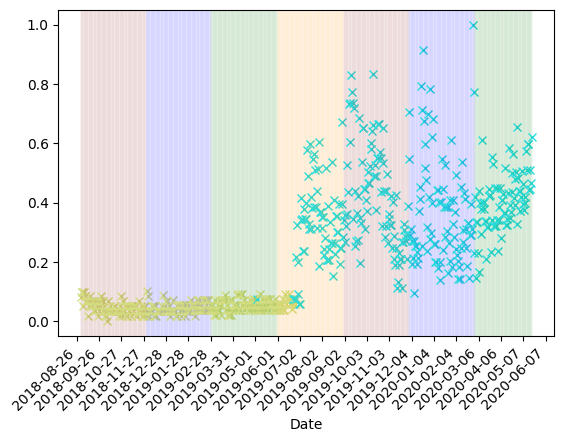

In [41]:
TemporalCluster(cycleA, labels, ["Eggs", "Death"], "DeathPerc")